In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

### EDA

In [5]:
path = './../../data/processed/'
X_train = pd.read_csv(path + 'train_features.csv')
y_train = pd.read_csv(path + 'train_target.csv')

X_test = pd.read_csv(path + 'test_features.csv')
y_test = pd.read_csv(path + 'test_target.csv')

X_val = pd.read_csv(path + 'val_features.csv')
y_val = pd.read_csv(path + 'val_target.csv')

### 분류 모델 학습

In [6]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost 이진 분류 학습
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=42
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72      3568
           1       0.76      0.61      0.68      3808

    accuracy                           0.70      7376
   macro avg       0.71      0.70      0.70      7376
weighted avg       0.71      0.70      0.70      7376



In [7]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier()

# 테스트해볼 파라미터 후보군 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# GridSearchCV 객체 생성
grid = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3,
                           scoring='accuracy', verbose=2)

# 학습 시작
grid.fit(X_train, y_train)

print('최적의 파라미터: ', grid.best_params_)
print('최적화된 모델 객체: ', grid.best_estimator_)
print('최적화된 점수: ', grid.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost 이진 분류 학습
xgb_clf = XGBClassifier(
    colsample_bytree = 0.8,
    learning_rate = 0.01,
    max_depth = 8,
    n_estimators = 100,
    subsample = 0.8
)

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['안정', '위험']))
print(xgb_clf.score(X_train, y_train))
print(xgb_clf.score(X_test, y_test))

              precision    recall  f1-score   support

          안정       0.65      0.83      0.73      3568
          위험       0.78      0.58      0.66      3808

    accuracy                           0.70      7376
   macro avg       0.71      0.70      0.69      7376
weighted avg       0.72      0.70      0.69      7376

0.7994731132806446
0.6979392624728851


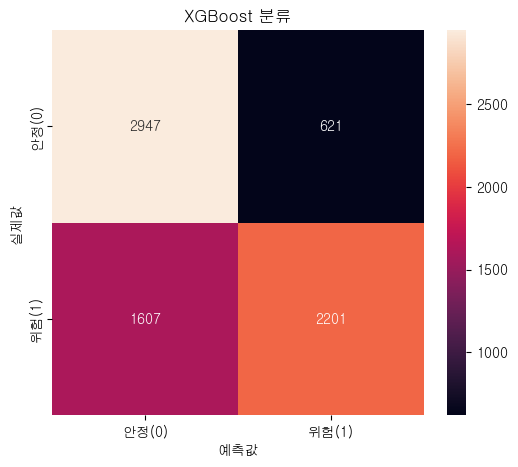

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['안정(0)', '위험(1)'],
            yticklabels=['안정(0)', '위험(1)'])
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.title('XGBoost 분류')
plt.show()

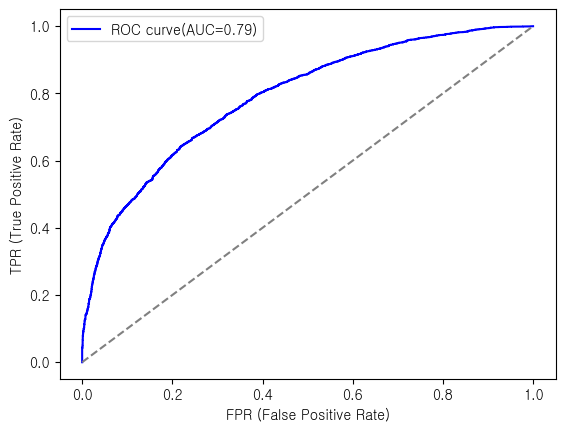

In [15]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0, 1], color='gray', linestyle='--')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

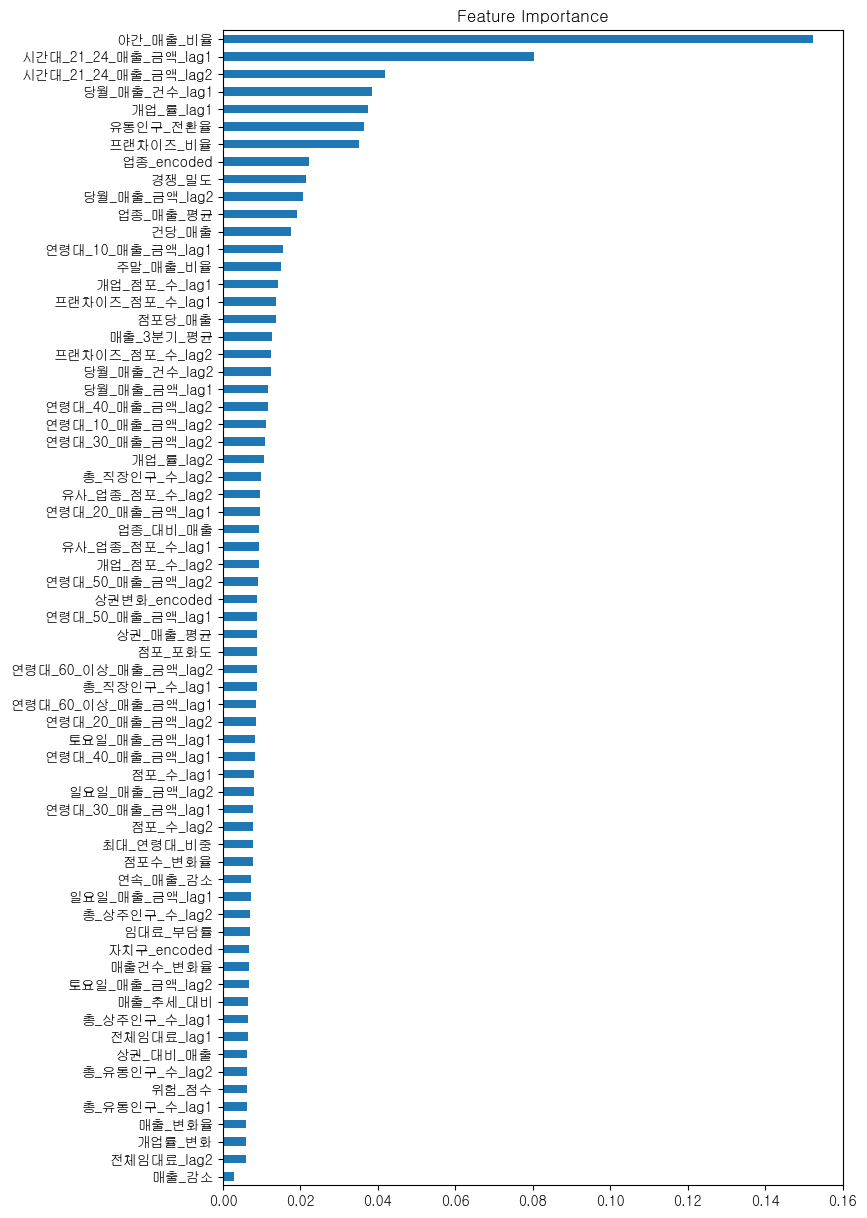

In [16]:
import matplotlib.pyplot as plt

# 전체 모델 기준 중요도
feature_importance = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
feature_importance.sort_values(inplace=True)

# 시각화
feature_importance.plot(kind='barh', figsize=(8,15))
plt.title("Feature Importance")
plt.show()